# Camada ```Linear```

Vamos começar importando o módulo ```nn``` e o ```torch```

In [1]:
# Importa as funcionalidades principais do PyTorch
import torch
# Importa o modulo de redes neurais para criar camadas lineares
from torch import nn # neural networks
# Define que os calculos serao executados na CPU
device = torch.device('cpu')

Agora vamos instanciar nossa camada linear, como vimos nos slides, com uma entrada de dimensionalidade ```d = 3``` e a saída de tamanho ```1```, já que estamos instanciando um perceptron simples. 

Qualquer dúvida, a documentação está logo ali ;)<br>
https://pytorch.org/docs/stable/nn.html#torch.nn.Linear

In [2]:
# Ajusta a semente aleatoria para reproducibilidade dos pesos
torch.manual_seed(42)

# Instancia um perceptron com 3 entradas e 1 saida
perceptron = nn.Linear(in_features=3, out_features=1)
# Exibe a configuracao da camada criada
print(perceptron)


Linear(in_features=3, out_features=1, bias=True)


Temos em mãos exatamente o mesmo modelo da imagem clássica do perceptron!

<img src="images/perceptron.jpeg" width="p00">

Os pesos ```W``` e o viés ```b``` são inicializados aleatoriamente pelo pytorch. Podemos consultar essa informação de duas formas:
* iterando em seus **```named_parameters```**
* acessando cada parâmetro individualmente através do seu nome padrão.

In [3]:
# Percorre os parametros nomeados do modelo e imprime seus valores atuais
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)
  
# Repete a exibicao destacando peso e vies separadamente
print('')
print(perceptron.weight.data)
print(perceptron.bias.data)

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [4]:
# Extrai os tres pesos do perceptron para facilitar a analise geometrica
w1, w2, w3 = perceptron.weight.data.numpy()[0]
# Captura o valor do vies associado ao hiperplano
b = perceptron.bias.data.numpy()

# w1 * x1 + w2 * x2 + w3 * x3 + b = 0

É importante não se esquecer que no perceptron esses valores definem um hiperplano no espaço. Como 3 dimensões está no limite da nossa capacidade de visualização, vamos aproveitar esse momento para visualizar o plano aleatoriamente inicializado pelo ```torch```. 

Para isso, usaremos aqui a biblioteca de visualização matplotlib, com o toolkit de plot 3D.<br>
Mais informações em: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#mpl_toolkits.mplot3d.Axes3D.plot_surface

Para se inspirar: https://stackoverflow.com/questions/48335279/given-general-3d-plane-equation-how-can-i-plot-this-in-python-matplotlib

In [5]:
# Imports para manipulacao numerica e visualizacao 3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
  # Converte pesos e vies do modelo para arrays numpy
  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()
  
  # Define a grade de pontos nos eixos x1 e x2
  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1, X2 = np.meshgrid(X1,X2)

  # Calcula os valores correspondentes em x3 para o plano
  X3 = (b - w1*X1 - w2*X2) / w3
  
  # Configura a figura 3D e ajusta o ponto de vista
  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(azim=180)
  
  # Renderiza a superficie que representa o hiperplano
  ax.plot_surface(X1, X2, X3, cmap='plasma')
  

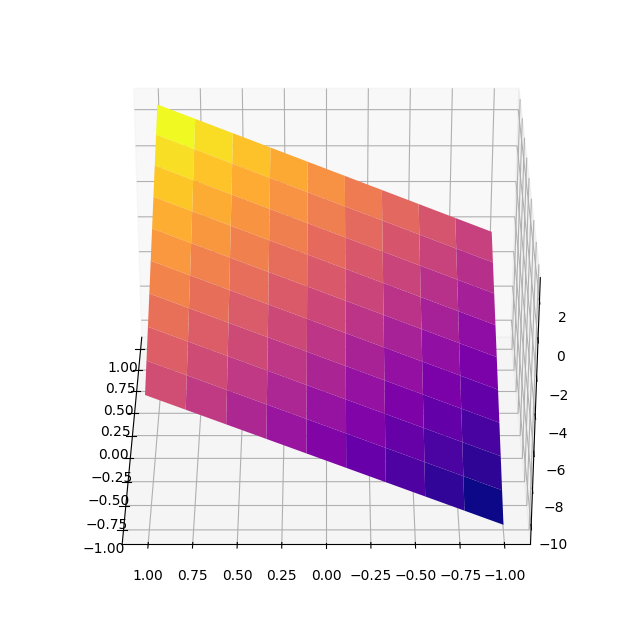

In [6]:
# Plota o hiperplano definido pelos pesos do perceptron
plot3d(perceptron)

## Forward
O fluxo da informação de entrada através da rede recebe o nome de *forward*, já que a informação é passada *para a frente*. Vamos então realizar o forward da nossa rede de um ~~homem~~ pereptron só. Para isso, basta realizar uma chamada de função com a variável onde instaciamos a camada ```Linear```.

```python
# Fizemos anteriormente a instância da camada
linear = nn.Linear(in_features=3, out_features=1)

# Para realizar o forward
y = linear(X)
```

tensor([0.7391], grad_fn=<ViewBackward0>)


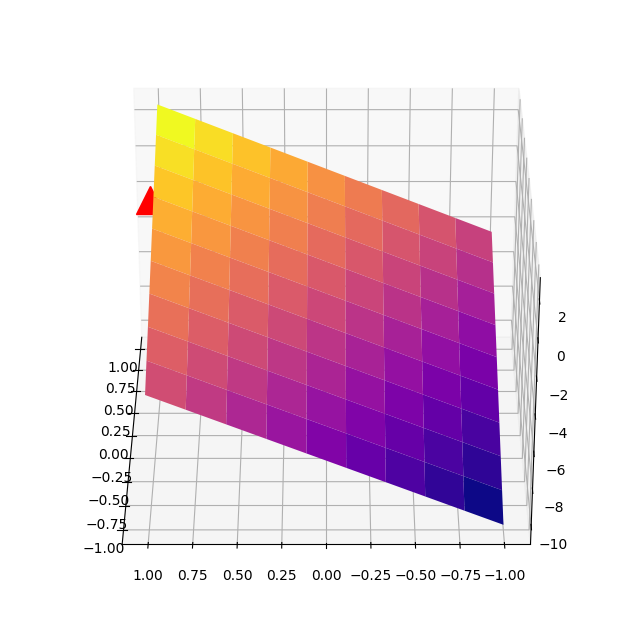

In [7]:
# Define um exemplo de entrada em 3 dimensoes
x_point = torch.tensor([0., 1., 2.])
# Calcula a saida do perceptron para o ponto informado
y = perceptron(x_point)

# Mostra o valor produzido pelo perceptron
print(y)

# Plota o plano e destaca o ponto avaliado
plot3d(perceptron)
plt.plot([x_point[0].item()], [x_point[1].item()], [x_point[2].item()], color='r', marker='^', markersize=20);


No notebook Classificação-Linear.ipynb, ajustamos manualmente um modelo linear para solucionar um problema de classificação. Para isso, usamos uma semente fixa ao gerar a distribuição de dados. A linha de código a seguir é o instante em que a semente é fixada:

In [8]:
np.random.seed(199)


Altere essa linha de código no script original, fixando uma semente no valor de 199. Em seguida, encontre os valores de w1, w2 e b que solucionam o novo problema de classificação gerado. As alterações do novo modelo devem ser realizadas nas linhas de código que precedem o seu plot, como apresentado a seguir:

-4.4
Acurácia: 54.0


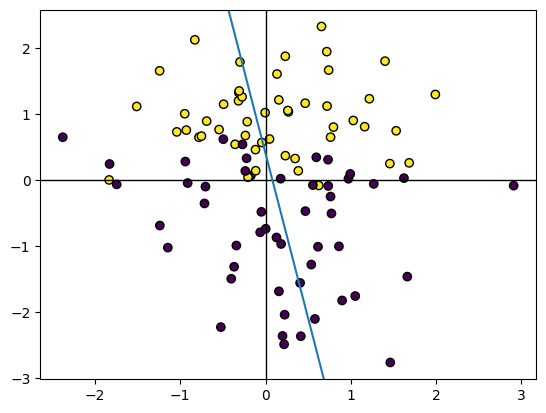

In [18]:
from sklearn.datasets import make_classification

# Gera o conjunto de dados bidimensional com a nova semente
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1)

def plotmodel(w1, w2, b):
  # Desenha os pontos originais do dataset com as classes
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  # Calcula os pontos necessarios para tracar a reta do modelo
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  # Plota os eixos e a reta gerada pelo modelo linear
  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  # Mantem os limites originais para facilitar comparacoes
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

def classify(ponto, w1, w2, b):
  # Calcula o valor da função linear para decidir a classe
  ret = w1 * ponto[0] + w2 * ponto[1] + b
  
  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

w1 = 5     # a
w2 = 1     # b
b  = -0.4  # c
# w1 = 0    # a
# w2 = 5     # b
# b  = 0  # c

plotmodel(w1, w2, b)

# Avalia o modelo para um ponto especifico
p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

# Mede a acurácia do modelo percorrendo todas as amostras
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1
    
    
print("Acurácia: {0}".format(100*acertos/len(X)))

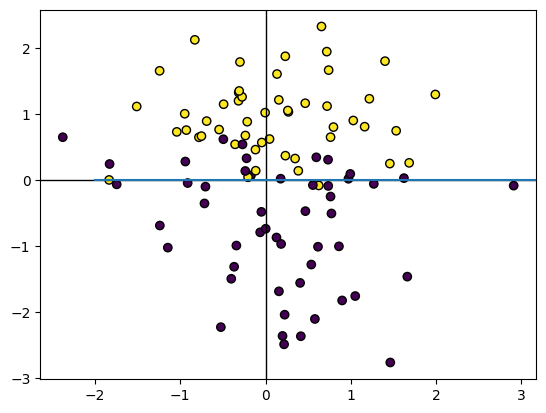

In [19]:
w1 = 0    # a
w2 = 5     # b
b  = 0  # c
plotmodel(w1, w2, b)

In [20]:
# Mede a acurácia do modelo percorrendo todas as amostras
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1
    
    
print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 84.0
